In [1]:
import pandas as pd
import numpy as np
import gutenbergpy.textget
import re
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from plotnine import *
import utils

In [2]:
# Load in book contents from Project Gutenberg and tokenize into words and sentences
book_contents = utils.load_book_contents(utils.book_authors)

In [3]:
# Tokenize into words and sentences
books_wtoks = utils.wtok_books(book_contents)
books_stoks = utils.stok_books(book_contents)

In [4]:
# Calculate various stylometric metrics (characters per sentence, words per sentence, characters per word)
book_stats = utils.calc_book_stats(book_contents, books_wtoks, books_stoks)

In [5]:
# Convert metrics to data frames
stat_dfs = utils.stats_to_df(book_stats, utils.book_authors)

## How do word and sentence lengths vary by author?

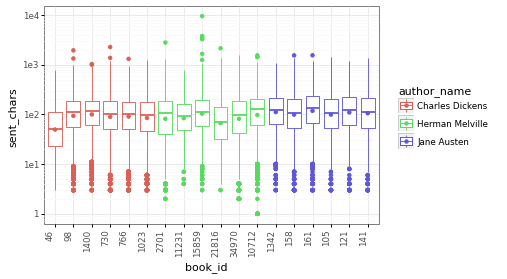

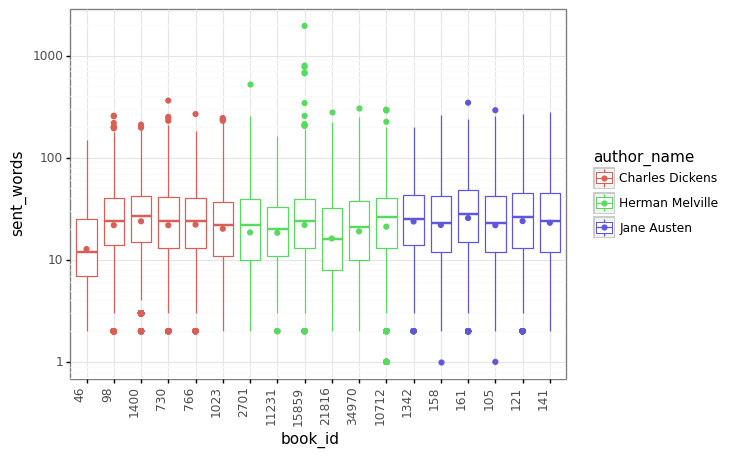

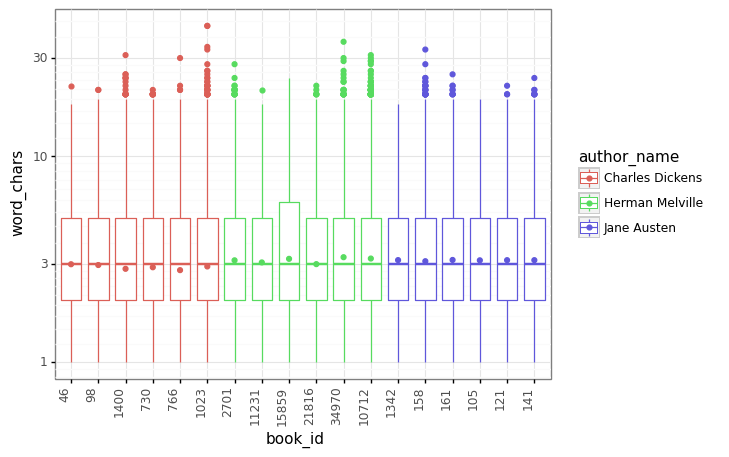

In [6]:
# Plot stylometric metrics
for plot_var in stat_dfs.keys():
    graph_df = stat_dfs[plot_var]
    graph_df['book_id'] = pd.Categorical(graph_df['book_id'])
    book_order = utils.book_authors['Charles Dickens'] + utils.book_authors['Herman Melville'] + utils.book_authors['Jane Austen']
    plot = (
        ggplot(stat_dfs[plot_var], aes(x='book_id', y=plot_var, color='author_name'))
        + geom_boxplot()
        + scale_y_log10()
        + stat_summary(fun_y=np.mean, geom='point')
        + scale_x_discrete(limits=book_order)
        + theme_bw()
        + theme(axis_text_x=element_text(rotation=90, hjust=1))
    )
    plot.draw(show=True)


## How do ngrams vary by author?

In [8]:
# Find the probability that a word in a sample is unique (vocabulary richness)
for author_name, book_list in utils.book_authors.items():
    print(f"Author {author_name}")
    for book in book_list:
        samp = books_wtoks[book][3900:4900]
        #samp = books_wtoks[book]
        uniq_words_proportion = len(set(samp))/len(samp)
        print(uniq_words_proportion)

Author Charles Dickens
0.397
0.416
0.384
0.395
0.348
0.438
Author Herman Melville
0.47
0.404
0.423
0.449
0.478
0.44
Author Jane Austen
0.431
0.394
0.42
0.369
0.411
0.414


In [9]:
# Find ngrams in each book
book_grams = utils.get_ngrams(books_wtoks, utils.book_authors, 3)
author_ngs = utils.combine_ngrams_by_author(utils.book_authors, book_grams)

#### Which ngrams are most common in each book?

In [14]:
# Get a data frame of realtive ngram counts (ngram probabilities) by book, for 1 to 3-grams.
author_ngs_combined_all = {n:utils.get_combined_ngram_df(n, utils.book_authors, books_wtoks) for n in range(1,4)}
author_ngs_combined_all[1].head(10)

,ng,count_1342,count_158,count_161,count_105,count_121,count_141,mean_ja,all_ja,count_46,...,mean_cd,all_cd,count_2701,count_11231,count_15859,count_21816,count_34970,count_10712,mean_hm,all_hm
0,"(,,)",0.065224,0.064349,0.070900,0.071672,0.067101,0.066728,0.066914,True,0.077393,...,0.078034,True,0.075055,0.073142,0.094729,0.098832,0.077069,0.080556,0.078813,True
1,"(the,)",0.028805,0.025749,0.027418,0.031801,0.032077,0.031170,0.029987,True,0.039721,...,0.037013,True,0.053591,0.033019,0.052452,0.039282,0.044180,0.058230,0.048316,True
2,"(.,)",0.028116,0.027703,0.024524,0.028465,0.024159,0.026996,0.027350,True,0.038767,...,0.029839,True,0.027989,0.036455,0.029279,0.031478,0.026965,0.029136,0.029207,True
3,"(to,)",0.028076,0.027248,0.028751,0.028057,0.024148,0.028584,0.028066,True,0.018093,...,0.021364,True,0.017640,0.024575,0.019806,0.018592,0.020004,0.020034,0.019905,True
4,"(of,)",0.025308,0.022751,0.025337,0.026077,0.025765,0.025547,0.025442,True,0.018261,...,0.019414,True,0.025641,0.020731,0.025880,0.022468,0.026346,0.030803,0.025760,True
5,"(and,)",0.023818,0.023281,0.023263,0.027751,0.023763,0.028058,0.023791,True,0.028248,...,0.027956,True,0.023477,0.021023,0.019376,0.015043,0.029048,0.023457,0.022240,True
6,"(her,)",0.014323,0.012240,0.017176,0.011774,0.016253,0.015730,0.015026,True,0.001823,...,0.005495,True,0.001262,NaN,0.001500,0.000792,0.005301,0.000638,0.001262,False
7,"(I,)",0.013886,0.015651,0.013819,0.011417,0.013295,0.012602,0.013557,True,0.010239,...,0.016734,True,0.008103,0.030515,0.009347,0.012372,0.008768,0.006431,0.009057,True
8,"(a,)",0.013104,0.015806,0.014204,0.015569,0.016209,0.016041,0.015687,True,0.018542,...,0.017298,True,0.017608,0.019043,0.017215,0.020623,0.013472,0.021333,0.018325,True
9,"(“,)",0.012707,0.011239,0.011040,0.008040,0.011876,0.008831,0.011139,True,NaN,...,0.017472,False,0.006317,0.011181,0.006735,NaN,NaN,0.006648,0.006691,False


#### Which ngrams appear are unique to an author and appear in all of that author's books?

In [ ]:
# Find ngrams that exist in all of an author's books, but no other author's book
# These ngrams are unique to an author, and common through all an author's works
for n, df in author_ngs_combined_all.items():
    display(utils.get_uniq_ngrams_all(df).head(10))

,cd,ja,hm
0,"(Home,)","(insipid,)","(dollars,)"
1,"(door-step,)","(well-informed,)","(Ere,)"
2,"(well-remembered,)","(attributing,)","(dollar,)"
3,"(feint,)","(Austen,)","(hath,)"
4,NaN,NaN,"(Virginia,)"
5,NaN,NaN,"(annually,)"
6,NaN,NaN,"(socially,)"
7,NaN,NaN,"(snatch,)"
8,NaN,NaN,"(magical,)"
9,NaN,NaN,"(cents,)"


,cd,ja,hm
0,"(chair, and)","(as, herself)","(., Ere)"
1,"(feet, upon)","(prevailed, on)","(New, York)"
2,"(and, wept)","(resolved, on)","(of, New)"
3,"(the, lamps)","(felt, herself)","(sons, of)"
4,"(,, clapping)","(She, wished)","(slid, into)"
5,"(street, door)","(determined, on)",NaN
6,"(door, at)","(s, marrying)",NaN
7,"(red, in)","(so, totally)",NaN
8,"(said, these)","(large, fortune)",NaN
9,"(a, feeble)","(letter, which)",NaN


,cd,ja,hm
0,"(All, this, time)","(Do, not, you)","(prior, to, the)"
1,"(in, the, court)","(she, ;, “)","(air, ,, he)"
2,"(went, out, ,)","(in, her, power)","(,, in, certain)"
3,"(said, the, gentleman)","(they, parted, ,)","(of, New, York)"
4,"(feet, upon, the)","(,, she, began)",NaN
5,"(his, shoulder, .)","(., She, wished)",NaN
6,"(upon, his, shoulder)","(more, than, she)",NaN
7,"(head, against, the)","(her, feelings, ,)",NaN
8,"(looked, about, him)","(not, you, think)",NaN
9,"(on, the, arm)","(curiosity, to, see)",NaN


#### Which ngrams are common in an author's work, and are more likely to be found with that author than other authors?

In [13]:
# Find the most common ngrams in an author's work, that are much more likely to be found
# in an author's work than in other texts, using a minimum odds ratio (compared to mean of all authors).
# 2.3 seems to be a good minimum odds ratio for author classification
for n, df in author_ngs_combined_all.items():
    display(utils.get_likely_ngrams(df, min_or=2.3))

,cd,ja,hm
0,"(t,)","(herself,)","(sea,)"
1,"(don,)","(sister,)","(THE,)"
2,"(boy,)","(Lady,)","(ye,)"
3,"(until,)","(Sir,)","(ere,)"
4,"(streets,)","(Her,)","(concerning,)"
5,"(shaking,)","(feelings,)","(original,)"
6,"(pursued,)","(acquaintance,)","(land,)"
7,"(although,)","(visit,)","(aspect,)"
8,"(Court,)","(comfort,)","(strangely,)"
9,"(mud,)","(carriage,)","(grand,)"


,cd,ja,hm
0,"(’, t)","(., She)","(,, yet)"
1,"(don, ’)","(,, she)","(., Nor)"
2,"(s, a)","(she, had)","(sea, .)"
3,"(the, boy)","(she, was)","(at, times)"
4,"(one, another)","(she, could)","(the, stranger)"
5,"(the, streets)","(and, she)","(owing, to)"
6,"(her, hands)","(her, own)","(,, thought)"
7,"(and, took)","(for, her)","(the, land)"
8,"(down, at)","(., Her)","(air, ;)"
9,"(old, gentleman)","(am, sure)","(., Like)"


,cd,ja,hm
0,"(don, ’, t)","(I, am, sure)","(;, yet, ,)"
1,"(!, ”, said)","(I, do, not)","(., So, that)"
2,"(’, s, a)","(., She, was)","(,, also, ,)"
3,"(., “, Now)","(she, could, not)","(some, sort, of)"
4,"(., “, Yes)","(., She, had)",NaN
5,"(!, ”, The)","(,, she, was)",NaN
6,"(I, was, to)","(;, and, she)",NaN
7,"(looking, at, the)","(could, not, be)",NaN
8,"(the, fire, .)","(”, said, she)",NaN
9,"(looked, at, the)","(she, had, been)",NaN
